# Sentiment Analysis of Twitter Data

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

## Reading Dataset

In [5]:
df_tweet = pd.read_csv(r'C:\Users\Brij\Downloads\archive\training1600000.csv')


In [6]:
df_tweet.head()

Target          Id                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

## Ploting Dataset as per Sentiment Value

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Questions')

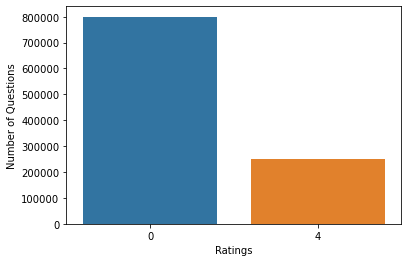

In [7]:
sns.countplot(df_tweet.Target)
plt.xlabel('Ratings')
plt.ylabel('Number of Questions')

In [8]:
df_Neg = df_tweet[df_tweet['Target']==0]
df_Pos = df_tweet[df_tweet['Target']==4]

In [9]:
from PIL import Image

## Ploting Word Cloud of Negative and Positive Tweets

In [10]:
twitter_mask = np.array(Image.open(r"C:\Users\Brij\Desktop\twitter_mask.png"))

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Neg['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negative-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

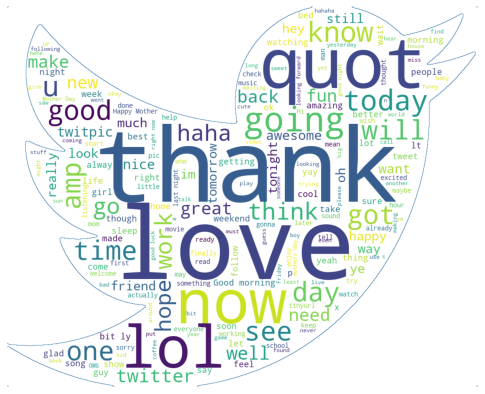

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Pos['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positive-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

## Adding Sentiment from Target Value

In [12]:
df_tweet['Sentiment'] = df_tweet.Target.replace({
    0:'negative',
    2:'neutral',
    4:'positive'
})

In [13]:
df_tweet.head()

Target          Id                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text Sentiment  
0  is upset that he can't update his Facebook by ...  negative  
1  @Kenichan I dived many times for the ball. Man...  negative  
2    my whole body feels itchy and like its on fire   negative  
3  @nationwideclass no, it's not behaving at all....  negative  
4                      @Kwesidei not the whole crew   negative

In [14]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
from textblob import TextBlob

In [17]:
df_sample = df_tweet.sample(n=50000)
df_X = df_sample['Text']
df_y = df_sample['Sentiment']

## Introduced Subjectivity and Polarity with use of TextBlob

In [18]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_sample['Subjectivity']=df_sample['Text'].apply(getSubjectivity)
df_sample['Polarity']=df_sample['Text'].apply(getPolarity)
df_sample

Target          Id                          Date      Flag  \
313160       0  2001691153  Tue Jun 02 01:44:25 PDT 2009  NO_QUERY   
22144        0  1557424541  Sun Apr 19 04:01:55 PDT 2009  NO_QUERY   
131749       0  1835599671  Mon May 18 06:21:09 PDT 2009  NO_QUERY   
35519        0  1565258093  Mon Apr 20 06:18:52 PDT 2009  NO_QUERY   
687407       0  2251264444  Sat Jun 20 02:57:21 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
596883       0  2219129775  Wed Jun 17 23:51:35 PDT 2009  NO_QUERY   
953928       4  1824749466  Sun May 17 02:45:36 PDT 2009  NO_QUERY   
629586       0  2231697680  Thu Jun 18 18:54:33 PDT 2009  NO_QUERY   
11103        0  1551203341  Sat Apr 18 08:25:24 PDT 2009  NO_QUERY   
81505        0  1752740433  Sat May 09 22:49:59 PDT 2009  NO_QUERY   

                   User                                               Text  \
313160  spidermonkeyloo  oh dear. apparently i talk to people like i'm ...   
22144          sjclark9  Finished the last of my 18 extras for this wee...   
131749      galleysmith  @toniandrews I'm sorry you are unwell. Do you ...   
35519          MegsEggs  @Schofe can i come work at this morning? i'm b...   
687407      yulitaputri                    i miss him  i want to meet him!   
...                 ...                                                ...   
596883      shanedawson                i want an iphone but i have sprint    
953928    LindaStanford  Remember - your thoughts of today create your ...   
629586   blueberryshoes  i want a cappucino skor blizzard. wait, they d...   
11103        jacquiesce  Suppose to be going out tonight but feel ill s...   
81505     IndpndntMogul  @KJLHMixdown did ya'll already air the intervi...   

       Sentiment  Subjectivity  Polarity  
313160  negative      0.350000  0.050000  
22144   negative      0.529167  0.000000  
131749  negative      1.000000 -0.500000  
35519   negative      1.000000 -0.500000  
687407  negative      0.000000  0.000000  
...          ...           ...       ...  
596883  negative      0.000000  0.000000  
953928  positive      0.335227  0.142045  
629586  negative      0.000000  0.000000  
11103   negative      0.500000 -0.250000  
81505   negative      0.500000  0.136364  

[50000 rows x 9 columns]

In [19]:
# #Plotting the polarity and subjectivity
# plt.figure(figsize=(8,6))
# for i in range(0,df_sample.shape[0]):
# plt.scatter(df_sample['Polarity'].iloc[i],df_sample['Subjectivity'].iloc[i],color='Green')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [20]:
df_X = df_X.astype(str)

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Overall ratings')

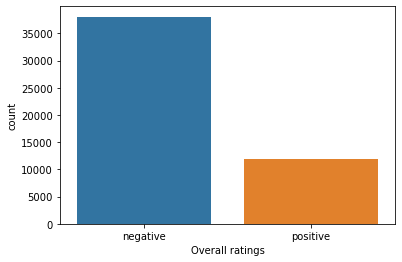

In [21]:
sns.countplot(df_y)
plt.xlabel('Overall ratings')

In [22]:
df_X

313160    oh dear. apparently i talk to people like i'm ...
22144     Finished the last of my 18 extras for this wee...
131749    @toniandrews I'm sorry you are unwell. Do you ...
35519     @Schofe can i come work at this morning? i'm b...
687407                      i miss him  i want to meet him!
                                ...                        
596883                  i want an iphone but i have sprint 
953928    Remember - your thoughts of today create your ...
629586    i want a cappucino skor blizzard. wait, they d...
11103     Suppose to be going out tonight but feel ill s...
81505     @KJLHMixdown did ya'll already air the intervi...
Name: Text, Length: 50000, dtype: object

In [23]:
df_y

313160    negative
22144     negative
131749    negative
35519     negative
687407    negative
            ...   
596883    negative
953928    positive
629586    negative
11103     negative
81505     negative
Name: Sentiment, Length: 50000, dtype: object

In [24]:
df_rev = pd.DataFrame(data=df_X)
df_rev.columns = ['Text']
df_rev.head()

Text
313160  oh dear. apparently i talk to people like i'm ...
22144   Finished the last of my 18 extras for this wee...
131749  @toniandrews I'm sorry you are unwell. Do you ...
35519   @Schofe can i come work at this morning? i'm b...
687407                    i miss him  i want to meet him!

In [25]:
for i in range(len(df_X)):
        test_data = df_X.iloc[i]
        print(test_data)

oh dear. apparently i talk to people like i'm their mum 
Finished the last of my 18 extras for this week whilst on camp with year 9s. Twitter is likely my only contact with the outside world 
@toniandrews I'm sorry you are unwell. Do you have allergies? That could cause diziness 
@Schofe can i come work at this morning? i'm bored here. 
i miss him  i want to meet him!
@hollywoody were thinking about going to tigerheat!!! we can't go to fiesta  my roommates dont have ID'S lol
@despari yeah we'll never see that one. 
@Erocc youtube it papa, I just saw it right now. Its the end of the world 
@ssparrow_81 my blood sugar has been waaaay out of control since yesterday, because of that I'm having migraines and my kidneys hurt 
@IndywoodFILMS I did...just answered it for ya! 
isnt feeling too good 
@deathburlesque ha, glad to hear it!  any plans for today? 
Sausage wrapped with bacon, yummy. But not too good for throat 
Dear Smart and Final, You've become...a grocery store.  Confused, Sarah
@J

back to the hospital [keep praying for papaw] start my new job tomorrow  exciteddd.
ugh. gas prices are back up.  i'm gonna have to start paying for the stupid gas to LA everytime we freagggin go!
Going to bed. I feel sick inside 
http://tweetvalue.com/  My twitter is worth $6 ?!?!?!?!?!     
Sáng nay ngồi ch�? phát sóng Q &amp; S Show.. mà hem có phát 
sad that school is over gonna miss all my friends and teachers 
Thats depressing.. Im down now.   
sad day for F1 
@reeology Awww.. that is sad. 
My ac is broked. 
i just won 15 bucks in poker 
sooooooooooooooooooo bored K-line just had 2 go 2 her little brothers soccer game! Today wuz our adventure day! 
@nidiamazing I bagged Sims 3 a month ago! But my laptop is running on low ram and causes major lag in my game. 
@Abeeliever I'm wonderful thanks! sent the email 
I've been getting attacked by allergies ever since I got back from NV 
@ChrisMatkaris hey! Dead Poets Society isn't for everyone &amp; I know you have excellent taste in films

@Jonas_Dreamgirl i haven't seen the ad either  I don't watch much tv XD
Getting stuff ready for the wedding shoot tomorrow! 
@Psythor When I finally found wifi it was in a macdonalds. One of these &quot;view 4 pages NOW PAY!&quot; affairs. Sod that! Off to Camden today! 
@cocolee117 Try 2 have some propolis or ???. Both r good 2 throats n u'll feel better soon. Good luck on ur recording 
i miss my short hair  shower. bed. relax. i should order my books for school.
Off to bed. Its gonna be a hectic day tomorrow 
i have a veryy hard bet with a friend i have to have 100,000 followers and she too :S omg i have to win! but i don't think 
@JadeIsla ooooooooooo jadey i found u i found U! i just made this thing and no one is following me  can u follow me plz lol xxxx
Just finished the first week of the new job, all going well so far. Don't have internets at home until 3rd of July though 
@meso_maniac  my pleasure completely.. might have some weather questions for ya later on 
@samantharonson T

@DonnieWahlberg Hey Donnie!! I wish you guys would have been able to come to NC..i had tickets but then they said it was cancelled 
Default passwords finance terror:  http://preview.tinyurl.com/kruej4 it would almost be funny, if it weren't so sad 
@sheps999 are you sick? 
i cant waitttt for the NBA draft party. come soooner 
Can't sleep. I'm really anxious abt my trip to Hawaii in a few days. I hate that my hubby can't come. 
gonna study for commerce. then, online. study is what that tires me. 
@mrassman no i havent which suckssss 
Lots of huge server cabinets full of hot-swappable drives have arrived in the warehouse this week.  All very modern! Thanks Mr C 
looks like I won't be going to the wedding after all  damnnn transportation
@theresa162 Absolutely! Lookin' forward to it 
work til 5... 
@Elaine_W_84 http://twitpic.com/5cr8t - Lovely Beach!  x
i'm home from peru; i miss it already 
My Internet is down. 
@BrokePimpStyles Yeah  And now I might have 2 battle w/Best Buy over no op 

@kellysparrow omg no! I liked her so much! 
another day without school (; - Abistreich - . So happy to have you back. &lt;3 Now cleaning up my room   yeay, the sun is back again, too.
@decorus I DONT KNOW!!! 
Bluuh, i always seem to miss the fun!  I don't really get the trending stuff actually ;$
So glad its friday! Only 1 week of schol left.  im glad its almost summer though.
@tallcathy not fairrrrr  get me sidneys phone number!! hah
@dougiemcfly LOL! Hahaha don't sleep first!  Can you please reply to me? @tommcfly won't.  Please! I love McFly!
@haygurl I was all excited to watch your new video but it won't load on my iPhone 
I hate being effin shy and always cautious of what I do!! gawd 
No housewives tonight  DVR kept skipping. Spending my night painting my nails Barbie pink for Graduation!
@mahglotte I haven't had a crepe in months! I do miss. 
Lovein my shinny new phone.   not lovin the loss of numbers. 
I'm bored at the airport  Text me anyone? Even though I'm pretty sure everyon

@drewbaccaorr cynical enough today to think that my kitten status is near the bottom of the list of reasons i won't see you ever  
@heyythereashley I have no gas !  and I think the broham is about to use the carrrr .
I feel like I should change my picture but I don't think I could part with my bff Audrey Hepburn. 
@DonnieWahlberg Weep! U neva took a pic of me in my M&amp;G...oh, that's cos I didn't meet U in my M&amp;G.  So many new kids, so little time! 
just woke up and i have a headache! =/ and i have homework to do 
sooo...i found real west virginia, new york, new jersey, kentucky drama in my cell phone texts...pretty sad. 
@catfacehorse @swingdag oh I'm at workshops tomorrow....Level 2 though. Am not going tonight 
I'm to sad to reply to everyone.. Sorry  I'm going to bed.. Last game for me.. Leaving on Monday for Jacksonville
my phone is seriously dumbb. it wont turn on 
After working 5 hours on a project at university. i go to bed now. In 6 hours i will have to wake up. 
@failur

@poppygirlx this the white icecream with a flake in it? Something i will love off of when there... no yummy flakes here. 
@ZooeyDe Nice to see you on twitter... enjoy family time   If you ever consider hiring a vibraphone player for LA gigs, think of me 
@megan_kruger think I may be slowly catching a cold! 
is bored to death, just flicking through tv channels, bugger all on. guess im not used to being in on an evening 
@IntergalacticFW when edward leaves her in the beg. 
Thank god its friday but too bad its not payday.... 7 more days of stress! 
@billzucker I sure did, loved the video.  Think I favorited it too!  It is great! 
@electric__eel SORRY NA! ) HAHAHA! GOSH. ) IT wasn't even in my dictionary..  ) which even made it more embarrassing! LOL!
Is addicted to sonic 
Has anyone got any spare tickets to go see Pink in Melbourne? I dont have a credit card I can use to purchase online 
wants to thank you all for following!!! Happy twittering peps!!! 
where r u feb? i need u here! 
@lind

@usul02 Lol! I know. he isnt the right colour though!  he's supposed to be 'russet.'
is so so hott. im done with this weather 
leaving for my last day 
@purelynarcotic They're beginning to say &quot;should of&quot; here too. 
Getting ready for my cousins grad dinner.. But I'm sick... 
It's the middle of may. I shouldn't have my heater on full blast 
Recovering from my sprained ankle 
@floodfx wow...love flight control, but only at 188 
Man today is going sooooo slowly today 
@jamie_oliver  I was off by one year. I really wanted some of Jamies cooking books in ENGLISH!!!! not German. 
@oliviamunn the way the lakers have been playing we could use u 
Would like the legs to tan or at least go red!!!! Buts its not happening!!! 
Chillin' &amp; Grillin'! 2 bad me gots 2 go 2 work later! 
I'm going to cry!! 
rockets are toast, chris paul is gone, dwade is gone...i have no reason to continue watching the playoffs 
Nice ride in with the exception that every time I finish up my allergies EXPLODE.

awwww!  @lucerocarol is not feelin too well 
@inashlalaland noooo, doon't cryyyyy. I 	haaaate to see bad 
@laureltouby It's a good thing you missed the bb game 
Welcome to all who just got the e-mail blast  The Starlight Bowl site, blog, Twitter, and Facebook accounts are now live!
He's makin me go to bed!  GN
Well that exam rocked...one more to go - the one we've all been dreading! Bit of revision tonight before work tomorrow 
Don't want to go back to school tomorrow  BOOO school!
@alexa_chung ohhh  I always find it interesting to see what you wear at Glastonbury. Maybe you should pretend and take photos.
Sorry everyone.. Server errors really suck   I'm working on it.   www.mywetspot.org
I need to convince my dad to buy me the Russian doll name necklace from @ladyluckrulesok  I love it.
@LeticiaLB I miss you! 
@thecolin1 http://twitpic.com/6fujm - not smiling again  but I'll cut you slack this time
Emmet's house tomorrow for a bit of a piss-up 
@JessicaBurciaga Dude that is scary!!!  

I pulled a muscle at work walking in heels. That would happen to me....all cuz I wanted to look cute hah 
sitting at wrk  finished at 3.30 til mon 4 a local hol. ye ha!!!
I met like the hottest piece of brown suga tonight &amp; yes she I got the #. She was like U better call me, haha. I'm such a ho sometimes 
@sethshaw i'm glad pie day went over well! i was stuck at work until 7. no pie for me 
@JewishAgency Nice photo stream, thanks for sharing 
working a double shift on the worst night's sleep ever. not fun. 
@kateparks lovin it!!!! see you soon 
@Cheerforum LOL! I'm working on it! Developer says it might be down for a little while tonight while all links and url's are changed 
back from immigration department! i hate my mugshot 
@tweetie well that's impressive. Both spot 25 AND spot 26   http://twitpic.com/2yabd
@Aldraku Ouch... it'd been a gorgeous day here today... and I've been stuck inside all day 
hungry and i dont get lunch till another couple hours 
@michellexhannah awh okay 

Good Morning everyone!  I wake up to yet another day of coughing, plus my daughter has a fever, yay! 
1 BK veggie + 1 BK bbq beefacon + 1 frenchfries + 1 mediumcoke for dinner?WTF?am I that hungry? 
@soniablaze happy mama's day!!! lets get that baby out tn 
I think all the sweater vests at F21 are all extinct.  I can't find them anymore. 
@csiriano none of your pics are working. the links are broken on all of them 
@misfitina Lots of hoping, just not much hope.  It's very sad - I keep flicking back to the news pages wondering if there's anything new.
uhh I'm soo boreedd  Someone put me out of my misery 
there is the sound of the most poorly starter motor I have ever heard outside.  Poor little thing
Happy easter !!! Everyone 
Almost went entire day without migraine, until now that I'm trying to fall asleep. 
7:00am gym time... Really sucks!! There's no place like home, There's no place like home... Crap I am still here.. 
@MadisenHill Hope you had an amazing show!!!!!!! Im so sad i was

@urlunknown omg I'm sooooo sorryy, it was actually intended for my friend. that's my bad, sorry 
abou 2 go home.....after wrkin 24 straight @ wrk ths weekend 
@themakeupbar thank you so much for the well wishes! Better today, just not 100% 
#twitter died on me yesterday... couldn't go on at allll!!! 
trying to find photos from this pre-halloween photoshoot... but i didn't have my sideburns did 
in office now...trying to sort out 10000s of credit card statements 
@_shanika_ Well I AM in my bed. Lol. I have insomnia...thinking about someone right now 
@TommyXtopher A-1 on burgers every now and then.  Not every time.  That'd be pretentious.  
just auditioned now back to corona...i hate that i drive 2 hours for a 2 minute audition hmmp....pray that i get the part 
@RealWorldMom I'm breathing, so I reckon I'm great 
felt cowboyish in the morning. so, slathered some bay rum as aftershave. too sweet-smelling for my taste 
Mehhh I'm going to bed even though my iPod hasn't finished charging 
@a

@Ithildyn I have to practice my nagging 
@jojojet exactly. see, i've turned for the worse since i dont have u in my life 24/7 now  melissa said she may come up tho &amp; bring u 
@swayswaystacey hahaha awh, what did he say 
Still at airport waiting..  been on ground for 20 min..
@tismrwells  Aw I take it the interview didn't go as hoped? 
Being productive ... and liking it 
@apthemayor don't call her lol 
Im so angry! Im gunna cry again! Someone txt me!  1714-457-7893
iPhone is an amazing device ... it keeps u connected all the time ..... but I think it is just too expensive 
vote for @xxStephy http://www.tripcentral.ca/PHP/funny/index.php?action=playVideo&amp;videoID=89 !  yayyy
@tweenkle77 A lesson was taught. Not sure if it was learned, but time will tell LOL. As of now, I'm changing some habits though lol 
Help! I need to somehow remove index.php From URLs using Expres. Engine &amp; I don't have a scooby where to begin.   Can anyone please help?
the new bebo smiles are wicked 
IM S

lying in bed sick as a dog... i want 2 go back 2 work 
my sister is in the canaries with her kids - its too bleeding quiet here without them - i miss the noise and the chaos - hurry back home 
@Alyfizzy I will call you later to get the details. Fatty 
@kotibeth seems that way 
spending the night at the hospital 
revising for science exams on monday 
Got accidentally bit  by my 83lb Labrador, Dakota, in the finger cause she thought she was dropping the banana I was feeding on the floor 
@mrtrev Hello!! Happy weekend to you!  thanks for the update, must be a tweetdeck thing... 
Nooo! Poor Duke had to be brought back cuz he wanted to eat their cats.  Must find him the best home possible!
@Juan787 http://znl.me/TZBIC - The good and the bad. Its all part of life. Its so sad. Sry Dave 
@hyoori btw, have you check the acoustic version? http://tr.im/lEcF 
Mornin' all from a REALLY cold, wet &amp; windy Cumbria. What's with this weather? Global warming my belly button ... More like new Ice Age 

OMj it'S WAy tO EARly iM DEAD tiRED!!!!  it'S 8:15 a.m (WHiCH iS NOt qOOD qEt BEiNq ON 5 HRS Of SlEEP! lONq DAy AHEAD
mm my house smells like cakee yumm  this weekend is wayy busyy i cant keep up!
I am soooo bored. Senior skip day yet I'm here because my teachers are giving huge test 
@hattiehattie prepared as requested, sadly my discipline failed me. It was very nice, if that's any consolation 
generally getting home from work around 11:30 means that I'm not the one that has to get up with the dog at 6 in the morning. I was wrong 
@justlikeanovel i know but i got a phone call 
can't sleep without that soft man blanket   sucks, hope i get used to it again.
@Banana_Happy ya  so sad lolz wanna watch it anyway they say rose looks like me for some reason I don't feel
hating that it will be another 4 or 5hrs before i can go to sleep 
Getting ready to go to grocery store...watching it rain 
What a start in the week... morning is all about jQuery and after lunch I'm off to @tweakfest  #doingt

@kimmymary i know what ya mean i inherited my dads short jaw, so it made all my teeth outta line 
@jubiedeane sunflower buses run the same as grey hound.  
@thebrownboi I think I need a pause from this past weekend  lol I was a wee to festive. How about two weeks?
More training. Don't wanna work though 
Today is my last day of &quot;tolerance&quot; for all you Spymaster folk - sorry 
@evilgordon bean bag and beer.......jealous!! M62 and M60 for me shortly 
@JCJ0300 No  we got to the tattoo place 2 late BuT we r going this weekend!! Woot woot!!
im dying to go sheesha 
Powers out  at kailas house
OMG i'm actually doing tech support at 1:13am.    Does it ever end?
wants to go to college 
@erickaxx 8-| i hate the fact that you've got internet on your phone. 
Well that was anticlimatic 
Good morning! Guess wot?!I had a nightmare, though Matt wrote me yesterday  xxx
do I really have to go back home today? 
@bytera  i'm at the office so can't click the link.  the fact that i'm twitting on the

thiago silva just messed me up 
what an evening yesterday...10PM to the vet  one of the guinea pig bled*wtf happend?* both feet...got 2 shots...*searching 4 reason*
@DiVA_STARR i cant see ur bg ur twitter replies covers it  twit pic it
@ygoloxelfer No  were gonna get it at 6am in the UK apparently!
@EL_Johnson You got it...good things will come  don't u worry!
Fed up of working hopefully it's soon the week end and monday bank holiday 
Getting the fatal error. But it should not be 
@jepsipepsi awww rain?  it's so hot and sunny here in Ipswich 
Pain.Lots of Pain.Stupid Throat 
@afreshmusic thanks! hope your morning is going well 
Getting ready for the first day of summer classes.....I am so excited to be going..... 
can't believe i am gonna do this alone 
I can't function without starbucks! 
@ilovepie Love it! I have a mega busy month. ove 100 hrs. 2 DTM night stops...no Gatwick - shame 
Or the universe 
@ktshep You're gonna have so much fun!! I'm going to miss you lots though! 
I'm havi

On the way downtown 4 10 hours of dance tech and dress rehearsals. Yay. 
Got a farewell party at school tomorrow... It's gonna be my last day at school 
@LucyBowen sooo excited about seeing actual mcfly @dougiemcfly  @dannymcfly @tommcfly and @mcflyharry! i miss @mcflyharry 's tweets 
Sleepy, tired and not feeling well... The price of working at least 20 hours a day for 4 consecutive days...  
qosh today is qoinq by slowlyy  haha.. waitinqq.
The item you've requested is not currently availible in the Estonian Store. FUCK YOU APPLE!!!  i cant be apart of #iscam sry @shwood 
@ElizaPatricia Never met you in person but miss you like hell. That must be your charm... 
@French_Kisses awww that sucks.. and u there for the whole summer!! 
@Cassandralool Hello same here it's heavily raining 
I haven't slept in in a long time. 
@mguethe That's what I said! On my Rotten Tomatoes webcam review...which hopefully has a chance in hell of making it on air this week.. 
doing laundry...i thought weekends

I want to go on holliday with @electricskyline 
I want an Empress of Blandings 
@liiizeth what's up? 
Just saw bunch of ducklings get hit. 
@nowamunkie wow i love meatballs too  spaghetti meatballs..yummy!
Work... 
@iheartphoto but that's what happens to me when I'm sick 
phone is about to die 
@wilw Time to generate some then?! 
#optus 3G has crashed and I cant do anything on my #iPhone... I feel like an arm has been cut off 
watching a movie, ate a dang good enchilada. Dentist tomorrow 
f**k, it´s raining again...where is the summer?? 
@MsCrazedlesbo aww *blush*** thank u darling gesture is returned  .. what u doing for tha day lav
still  this is harder than I ever imagined it to be
@BellaKavner98 i dont get to see until tomorrow  have fun watching though!
Very cold night. Brr. / So our classes will now start on the 16th. YAY! But I miss my friends!  And I need cash! Allowance $-)
says teknoman again  http://plurk.com/p/11ta7a
wishes she can talk to him before my regents 
Driving to 

@breatheheavycom Please let us join Exhale.  we are dying.
I'm without a car for at least a day 
thnks for accompanied me last night when the others were left  it was very thoughtful of you
@justajust im listening to hey young world right now  pretty good stuff. do you think kanye really is the new slick rick?
susan boyle delivers a stunning performance again but loses in the final &amp; finishes the 2nd 
Conversion of Units. :| Back to basic Physics. 
man, the book Virus is turning out to be pretty good but i gotta put it down, i have other work to do  
Wants someone to be there for her at 4:34 am after having a nightmare 
@Ryoma_Echizen c'mon where are u? 
ewy sausages for tea  i hate them!
Driving home from the beach 
@patte3992 I don't know, too. I just followed what JB said. 
@jannikaj  I'm sorry. You know I'm always around to help, if need be.
is busy text arguin wt her ex and wishes she knew were the hell she stood wit him  xxx
@dementes I had takeaway chips sandwiches lol. I th

@brolivia_k yes maam! will you be there tuesday, or do you work? 
@southsidekustom i will just let me know thx,have lost good friends 2 breast cancer,doesn't matter age 
Would appear not  note to self...change perfume!  What to do now..Hmm do I get the tarot cards out or not??
@BluePoles  Glad you liked it . I think I will open a Blue Poles Tempranillo in a day or two  to check on progress 
i cant figure out how to update... 
@danielmorrow1 whyyy isn't my ticket here yett?  we ordered them minutes apart!!!!
Oh shit 
I need a hug really badly 
@mytweeny Don't be scared to try it on...if all else fails  wear ur small wrestling team shirt 
Sad and missing Shane he's always gone when I need him 
Today has been long, I'm sleepy. Colin and I have only talked for eight minutes in the past 24 hours. 
@mindfulMeli ......(((hug))) ....TY for the #FFVIP mention 
I wish we were done!!! Not yet! 
@Ktok I usually go in with 2 few friends. he only some of us get in, it's no fun 
Fucking ayyy, my pare

sigh in jo'berg by my lonesome self 
@brooonagh its so arghhh! 
graduation, so sad 
@FatLossMama  what kind of workout are u doing now? Tabata style workouts are a great for short time frames your family is beautiful
yay finally  lmao
@IsabellaKuan My monthly thang is killin me too. 
@mikeyway please post Bandit's photo, Mikey  pleaseeeeeeee.
had a fabulous weekend 
i'm officially over the end of this school year; blah a million assignments to do  text &lt;3
Tomarrow is the last week day of masters 
finally awake  but in a bad mood..I hate unfaithful friends!
Feeling like crap once again. Every morning I wake up with a sore throat and no voice and completely drained. 
@pixievondust  i hope you didn't have a lot in it
Just dropped my cam and broke it. 
@jillzaa thanx! 
@itsmeduh woop! Doin it real big I see! Have 5 more and then you'll be at my level ha miss u mama 
Happy Mother's Day everyone 
i sat incollege thinkking why!!!!! 
Took another exam today, didn't expect I'd be stuck to a 

didnt end up going to see hannah montanna  i love video calls their so easy
@CFJamesAllen Sunday lunch - the BEST lunch of the week in my opinion.... always over-indulge.  I'm allowed on a Sunday, it's the law lol 
Looking for blue october's tour bus..don't look like they are here yet.. 
Dear ABC.com - netflix pop up NOT cool, very annoying, and has crashed FireFox 3 times now. Tired of restarting. Just want to watch DH 
How does the Christian vote work? If you hate Sunnis more than Shias, vote Aoun, if you hate Shias from that Sunnis, vote March 14. Sad 
School tommorow  but I'm in fourth year now 
Awkwardness is SO annoying... After nearly 5-years, you still have the ability to make me feel 2-inches tall! I GIVE UP 
@Bootcoot Dannii Minogue...mmm! That would be a result  x
@SilkCharm no one is tougher than you in those fierce boots! 
@emoisforluvers whole shelf!  oh and blood starts after 90 seconds. Fast forward to it 
is about to finish Fresh Prince of Bel Air.. Will miss the serie

I am soooo sick... I can't even talk, my voice is gone... And all I want to do is sleep all day. 
@baubert funny thing is I never saw Zach and colleen's old place  plus I wish i was hanging out w/ all of you .. http://tinyurl.com/klhj6y
@ddlovato Trust me your deffently worth it  Team Miley 
I MISS ARON  waaaaaaaaaaaaaaaaaaaaaaaah.
Leaving camping soon  fucking work!
Yahoo mail acting up...looks like some CSS mish-mesh!!  
prom was ok. totally drunk, woke up in friends house with cut knee, dress covered in champagne and one earring....v hungover 
@RobMcNealy Oh Rob that sucks, I'm so sorry  I really do hope you find it!
@centernetworks morning Allen, youre up early 
Still waiting...someone tweet I'm bored! And my ass hurts 
So much for going out  errz. All good. Quality time with the cousins
i think i can now put the 'ex-file' far, far away... He finally got the tick 
@Noway57 I wish I am cucu yang terbaik..hehe..yeah been a couple of times at UIA..coz step father did his masters there

My stomach feels weird and Harlow's keeps making noises. ugh. 
Ending my night with Ne-yo- Mirror ...thinking about my babe  goodnight twitter fam
Sorry to the cute girl who I promised I would go back to buy the RichardSolo iPhone external battery. I ran out of time.  #gadgetshowlive
@billkaulitzlovr It was just a horrible day.  Really horrible. I don't want a repeat, but I know it'll happen again.
@cboley but you have to ride back on a full stomach? Bummer  gl!
Back to work 
finals this morning and tomorrow morning, and crazy morning sickness to go with it. 
@ameym21wong Take the bus 
@marteyo that sucks 
@DiESELBBE awh me too bb  im gonna think of you!
@CainAndrews awwwh u stuck in traffic  booo!
isPlayer Has Died! Sorry 
Lots of estimates today. . . Work is slow again  
I hate the fact that I can't upload my photo  fitteslim
I think if today was a very slow day, it's going to be one heck of a loooooong week 
has just got back from shopping and my feet hurt....bad tyms 
Heat index is

YESSSS!!! They uploaded 2 episodes of Code Geass R2  So happy atm... I can tell its gonna be a late night
GRRRR...I need a hug but my boyfriend isn't around and neither are any of my friends!! 
@Benniboy22 how are u anyway, u asked if i was goin on msn and then u didnt show lol  xxx
okay, so neither diverting the mind to the project, and nor music helpd. wishing that this feeling just goes away. 
maybe, when I reach 500 followers, I should give a free 'half-en-half' party, � la bruxeloise like @nalden but half champagne, half wine 
@Kata159 hahah! i didnt win  agen! im really bad at guessing his ispy! its ded harddd! haha wat you up to? xx
Alex just called me a faggot  That's completely rude.
My little girl is officially a high school senior now!  
BMX fail at the skate park at 1.30am 
OMFG Lost makes me think now. 2010 is next season of lost  FAWKKK. Gonna take awhile.
No turkey today   Mom said tomorrow night. She'd better not forget!
@VIP_STATUS  nobody n the industry likes natural 

@itsLindsayLohan i know! im soo mad though cause in wont be able to watch it! 
@SandeepEmbar thats what i saw 
@georgiaface Let the Right One In? Aparently Drag Me to Hell also has some horrible cat nastiness 
Why must Unreal not do things properly when I want it to 
@Decinces I wish I could take ur heartache away 
@catawu It was!  I thought everybody had abandoned me! 
@curiousjayorge did you just cuss at poor tj 
i feel so bad for the people that were on the air france flight.. 
@timgws I think Linux and XP are two words that should not be together in the name of an operating system 
is banning Angela from the combination of alcohol, cameras, and Twitter. 
My eyes are closing. I am sleepy 
@rydka I know  but that's what the laptop has; old computer used for internet. I'm copying files to it, so I can format the external HD.
My brain age is 31 today..not a good look. 10 minutes before I have to go back to class. Where I get no signal. 
EXHAUSTED!!!! back aching..eyes twitching.i want 

cool, she's throwing up. 
@JeanXD wow, thank you  have a nice weekend anyway
Hi all, been a quiet week here.  Think I'm in mourning still  get to watch re-run of last epi tonight tho 
slow playing bullets, was lucky there 
I don't really know what I'm going to do about getting the rest of my stuff out of the house... 
@find_ch oh I didnt think of that...i only have to shave my beard once every other day so its not bad 
@jkdcgill How tragic.  http://bit.ly/17r30j Its a shame you didnt seek the right type of valuable information that could have saved him.
@nanavette THX for the link tho.. 
it's summer and it's raining. geeezzzz i miss my winter 
Okay ... I'll shut up now and leave everyone in peace for a few hours (except for mobile tweets, maybe). Off to work now 
@goatgirl66  Friday I get in at 4/5 and they are holding a house party. Let me see if there are a few hours then or sunday morning.
@PeterDeeTM how about twittin a LIIIITTLE dean keally hint? 
first i loose my bracelet. now i 

Man I think I just got a virus on my computer. 
Just had catonese chicken and my mouths on fire 
@AnditisLiz Omg!!! Lol.   Strawberry Daiquiri from bath n body works Is the best, smells sooo yummy! !  (Haven't tried it tho, lol  ) 
Brooklyn!!! We went hard!!! Now back up top!! But 1st Hajji's...yea again 
@tim_butcher Cold 
Anxiously waiting to ride the &quot;Dane Train&quot; tonight. 
Lost his phone 
@JavaMamaBuzz I'm ok, just bad allergies, stress and I never got to get that foot checked out. Still hurts I know I broke it 
is thinkin losing all her energy slowly... 
@LittleLee missing out? Never! It's icky! 
@califmom you still have time, girl! Nothing to wear here, either. And since J won't have a fargin' JOB after 7/15, no new stuff either. 
At a dance recital. I think its going to be a little lame, but at least im with @WhitleyL! 
Cookie time at the Subway! I'm always dissing the Subway but cookie time can not be denied 
@DonnieWahlberg I have no clue how to unsuck anything. 
@Dan

@Phoole we got to the Kenilworth Arts Bldg around 330 and saw Chloe, but not the installation - she'd just disinstalled it 
Hanging out with Maddie!! Didnt get a pet today...  still looking for my pet soulmate!
floorset kicked my butt tonight 
@ffolliet i dnt listen tho ;o) I'm off to school to tidy up last nites mess an return equipment to various places,all on my own 
So happy no extra tax on booze  ole smokes 25cent though 
feels forgotten  damn it... why wont he call?! http://plurk.com/p/xi0vj
doubleheader at Les today-- only 2 more home series left in the season 
Only an hour to go - then a long sit on the M5 
Am So Tired  Yesterday Was Soo Good :L
Does anyone out there have any great suggestions or remedies to help snoring?  Help please! 
come to think of it,.... for a lot of things 
@skip2myliu I didn't know! You didn't even say bye 
leaving galveston  hopefully we'll be back in june some time.
@mac_chic sooooo scary!!!! I wish I didn't read this cause now I'm gonna be scared go

is suffering from crawfish regret 
First Ronaldo and now Tevez, who next?!!!! 
@NursingDrPepper YO. whats up with the lack of contact?!  *grabby hands*
6:45am gettin ready for work,the weather is ugly today  and dont have an umbrella
 gooooood morning my twitter friends!  Have a nice sunday
@thebostonista Just found out the one in Fan. is under construction!!!! 
Dull week so far  ... Pending axn today.
All moving back in now.  still don't know whats happened. Its also lunch time!
JONAS WAS AMAZING&lt;3333333 Taylor loves it more then Jordan  buuuuut; i do HATE penny. just her character :ppp
www.ghostbustersishiring.com - Seriously?! WHY did I have to be born in the UK?! Only open to US &amp; Canada! I want to cry! 
@TomFelton Haha! What's it like looking back on work? Or fun, as I'm sure it was 
is working 
no movie this weekend..... waaa..... 
@jonasnessica I couldn't agree more! But haters will always hate 
da chick on mama mi has a dream.... 
@marzabar Also, my laptop was banished t

## Preprocessing and Cleaning of data 

In [27]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    columntext = doc["Text"] 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', columntext)
    
    tokens = cleantext.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [28]:
df_sample['Body_token'] =  df_sample.apply(clean_doc, axis=1)

In [29]:
def listToString(s): 
    
    columntext = s["Body_token"]
    # initialize an empty string
    str1 = ' '.join([str(elem) for elem in columntext])
    # return string  
    return str1

In [30]:
df_sample['Body_token_string'] =  df_sample.apply(listToString, axis=1)

## Feature Extraction with the help of CountVectorizer and Tfidf

In [31]:
def final(X_data_full):
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [32]:
df_new = df_sample['Body_token_string']
df_new= df_new.astype(str)

## Training and Testing Split

In [33]:
data_X = final(df_new)
X_train, X_test, y_train, y_test = train_test_split(data_X, df_y, test_size=0.25, random_state= 3000)

## Multinomial Naive Byes 

In [34]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
predictions = multinomialNB.predict(X_test)

In [35]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

multinomialNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
multinomialNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , multinomialNB_accuracy , " %")
print("f1_score : " , multinomialNB_f1)

              precision    recall  f1-score   support

    negative       0.80      0.99      0.88      9510
    positive       0.83      0.19      0.31      2990

    accuracy                           0.80     12500
   macro avg       0.81      0.59      0.60     12500
weighted avg       0.80      0.80      0.74     12500

[[9394  116]
 [2418  572]]
Accuracy :  79.73  %
f1_score :  0.745


## Decision Trees

In [36]:
# Decision Trees
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dct_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

[[8076 1434]
 [1766 1224]]
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83      9510
    positive       0.46      0.41      0.43      2990

    accuracy                           0.74     12500
   macro avg       0.64      0.63      0.63     12500
weighted avg       0.73      0.74      0.74     12500

Accuracy :  74.4  %
f1_score :  0.739


## Logistic Regression

In [38]:
model = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
log_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
log_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , log_accuracy , " %")
print("f1_score : " , log_f1)

[[9087  423]
 [1921 1069]]
              precision    recall  f1-score   support

    negative       0.83      0.96      0.89      9510
    positive       0.72      0.36      0.48      2990

    accuracy                           0.81     12500
   macro avg       0.77      0.66      0.68     12500
weighted avg       0.80      0.81      0.79     12500

Accuracy :  81.25  %
f1_score :  0.788


## Random Forest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 3000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [41]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      9510
    positive       0.60      0.32      0.42      2990

    accuracy                           0.79     12500
   macro avg       0.71      0.63      0.64     12500
weighted avg       0.76      0.79      0.76     12500

[[8867  643]
 [2031  959]]
Accuracy :  78.61  %
f1_score :  0.761


## Overall Accuracy Report of all Model

In [44]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontweight='bold',fontdict=dict(fontsize=15))

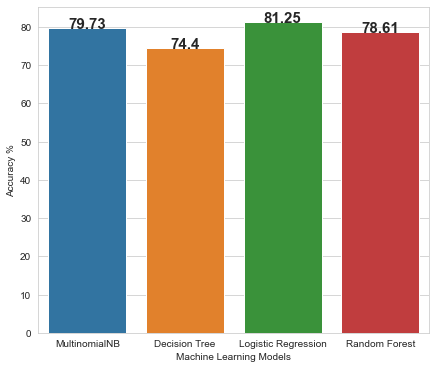

<Figure size 432x288 with 0 Axes>

In [49]:
model = ['MultinomialNB',  'Decision Tree', 'Logistic Regression', 'Random Forest']
acc = [multinomialNB_accuracy, dct_accuracy, log_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
plt.yticks(np.arange(0,100,10))
addlabels(model, acc)
plt.ylabel("Accuracy %")
plt.xlabel("Machine Learning Models")
sns.barplot(x= model, y= acc)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Final-Result-1', dpi=100)